# kNN Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_data_X = [[3.4, 2.3],
              [3.1, 1.8],
              [1.3, 3.4],
              [3.6, 4.7],
              [2.3, 2.9],
              [7.4, 4.7],
              [5.7, 3.5],
              [9.2, 2.5],
              [7.8, 3.4],
              [7.9, 0.8],
             ]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [3]:
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

In [4]:
X_train

array([[3.4, 2.3],
       [3.1, 1.8],
       [1.3, 3.4],
       [3.6, 4.7],
       [2.3, 2.9],
       [7.4, 4.7],
       [5.7, 3.5],
       [9.2, 2.5],
       [7.8, 3.4],
       [7.9, 0.8]])

In [5]:
y_train

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [6]:
# 要预测的点
x = np.array([8.1, 3.4])

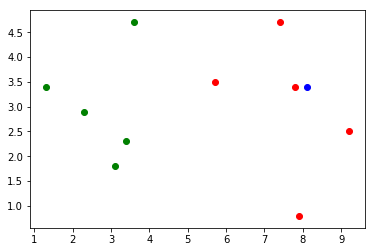

In [7]:
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='g')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='r')
plt.scatter(x[0], x[1], color='b')

[![37aMAs.md.png](https://s2.ax1x.com/2020/03/05/37aMAs.md.png)](https://imgchr.com/i/37aMAs)

## 1. kNN实现过程

- 欧拉距离
$$Dist = \sqrt{\sum_{i=1}^n(X_i^{(a)} - X_i^{(b)})^2}$$

In [8]:
from math import sqrt

distances = []
for x_train in X_train:
    # 计算欧拉距离
    d = sqrt(np.sum((x_train - x) ** 2))
    distances.append(d)

    # 也可以如下写法
# distances = [sqrt(np.sum((x_train - x) ** 2)) for x_train in X_train]

In [9]:
distances

[4.827007354458868,
 5.2497618993626745,
 6.8,
 4.684015371452148,
 5.821511831131154,
 1.4764823060233399,
 2.4020824298928622,
 1.4212670403551892,
 0.2999999999999998,
 2.607680962081059]

In [10]:
nearest = np.argsort(distances)
nearest

array([8, 7, 5, 6, 9, 3, 0, 1, 4, 2], dtype=int64)

In [11]:
# 找出距离最近的 K 个点
k = 6
topK_y = [y_train[i] for i in nearest[:k]]
topK_y

[1, 1, 1, 1, 1, 0]

In [12]:
from collections import Counter

In [13]:
# 对最近的 K 个值进行类别统计
Counter(topK_y)

Counter({1: 5, 0: 1})

In [14]:
votes = Counter(topK_y)

In [15]:
# 返回数量最多的 K 个值， 这里 K 为 1
votes.most_common(1)

[(1, 5)]

In [16]:
# 得出预测结果
predict_y = votes.most_common(1)[0][0]

In [17]:
predict_y

1

### 2. 使用 scikit-learn中的kNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
KNN_classifier = KNeighborsClassifier(n_neighbors=6)

In [20]:
KNN_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [31]:
# 在 sklearn 中， predict 接受一个数组
X_predict = x.reshape(1, -1)
X_predict

array([[8.1, 3.4]])

In [22]:
KNN_classifier.predict(X_predict)

array([1])

In [23]:
y_predict = KNN_classifier.predict(X_predict)
y_predict[0]

1

### 3. 重新整理我们的 kNN 代码

In [26]:
from kNN.kNN import KNNClassifier

In [27]:
knn_clf = KNNClassifier(k=6)

In [28]:
knn_clf.fit(X_train, y_train)

KNN(k=6)

In [29]:
y_predict = knn_clf.predict(X_predict)

In [30]:
y_predict

array([1])